In [1]:
# Import Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## How your Monthly Payment (Equated Monthly Installment) is Calculated

### Calculating a Monthly Payment (Simplified)

In [13]:
# California sales tax 7.5%
P = 31115 * (1.075)

r = 0.0702 / 12
n = 60

In [14]:
numerator = (r *((1 + r)**(n)) )
denominator = ((1 + r)**(n)) - 1

emi = P * (numerator / denominator)
emi

662.638532377825

### Calculating a Monthly Payment (with some fees included)

In [6]:
# Price + Tax + Emissions + Registration + Plate + Documentation
P = 31115 + (32615 * 0.0975) + 50 + 200 + 65 + 80

r = 0.0702 / 12
n = 60

In [8]:
numerator = (r *((1 + r)**(n)) )
denominator = ((1 + r)**(n)) - 1

emi = P * (numerator / denominator)
emi

687.2302176619154

In [18]:
'The Monthly Payment with fees included is {} higher'.format(np.round(687.23 - 662.64,2))

'The Monthly Payment with fees included is 24.59 higher'

# How Interest Rates/APR Affects Monthly Payments

## Calculate Total Interest Paid

Here are the steps to do this

1-) Divide your interest rate by the number of payments (12) you'll make in the year (interest rates are expressed annually). 


In [14]:
# Calculate one month of interest
P = 34689.9625
r = 0.0702 / 12

r * P

202.93628062500002

## How Much Interest and Principal you are Paying each Month

In [15]:
principal = P
term = 60

def calc_interest(principal, emi, interest_rate = 0.0702):
    
    # Assuming no fractional interst on a loan 
    interest_paid = np.floor( ((interest_rate / 12) * principal ) * 100) / 100
    
    principal_paid = np.round(emi - interest_paid, 2)
    
    new_balance = np.round(principal - principal_paid,2)
    
    return(emi, interest_paid, principal_paid, new_balance)

In [21]:
import numpy as np
import pandas as pd

principal = P
term = 60

def calc_interest(principal, emi, interest_rate = 0.0702):
    
    # Assuming no fractional interst on a loan 
    interest_paid = np.floor( ((interest_rate / 12) * principal ) * 100) / 100
    
    principal_paid = np.round(emi - interest_paid, 2)
    
    new_balance = np.round(principal - principal_paid,2)
    
    return(emi, interest_paid, principal_paid, new_balance)

payment_lists = []
for month in range(1, term + 1):

    emi, interest_paid, principal_paid, new_balance = calc_interest(principal, emi)

    payment_lists.append([month, principal, emi, interest_paid, principal_paid, new_balance])

    principal = np.round(new_balance,2)

In [22]:
payment_table = pd.DataFrame(payment_lists, columns = ['Month',
                                                       'Starting Balance',
                                                       'Repayment',
                                                       'Interest Paid',
                                                       'Principal Paid',
                                                       'New Balance'])

In [23]:
payment_table['Interest Paid'].sum()

6543.509999999999

In [24]:
np.round(payment_table['Interest Paid'].sum(), 2)

6543.51

## Loan and Principal Plot

Legend outside plot: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot


https://stackoverflow.com/questions/21918718/how-to-label-certain-x-values

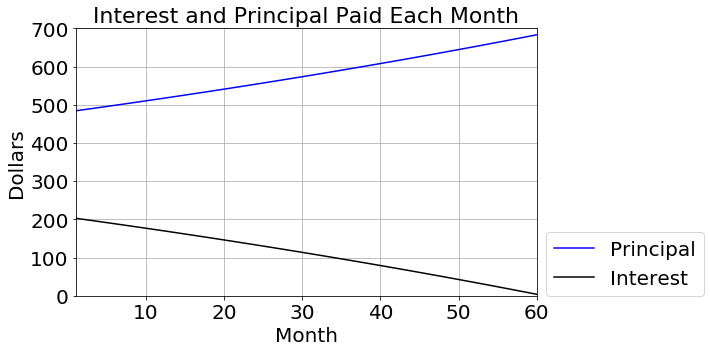

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(payment_table['Month'], payment_table['Principal Paid'], c = 'b', label = 'Principal');
axes.plot(payment_table['Month'], payment_table['Interest Paid'], c = 'k', label = 'Interest');

axes.set_xlim((1, 60));
axes.set_ylim((0, 700));
axes.set_ylabel('Dollars', fontsize = 20);
axes.set_xlabel('Month', fontsize = 20);
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
axes.set_title('Interest and Principal Paid Each Month', fontsize = 22)

plt.legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
plt.tight_layout()
plt.grid(axis='both')
plt.savefig('Interest_Principal.png', dpi = 1000)

## Refinancing Cost Comparison

3.59% vs 7.02% (show the cost of refinancing a car, assuming no prepayment penalty)